<a href="https://colab.research.google.com/github/Min0627/Data-Science-Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT 2 - DATA SCIENCE (STQD6014)

MUHAMMAD AMIN KHALILI BIN MOHD NOOR BIHISHAM (P158145)

#Happiness Data Analysis (2011-2024)

Data Sets: (https://docs.google.com/spreadsheets/d/1sz0Np9rTvwsp6r1W_S25gkLMtURZLylc/edit?usp=sharing&ouid=105058162430113252081&rtpof=true&sd=true)


**Intoduction**

This analysis explores the World Happiness Report dataset spanning from 2011 to 2024. The report ranks countries based on their happiness levels using factors like GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Understanding these rankings and their contributing factors can provide valuable insights into global well-being trends and the elements that contribute to a nation's happiness.



Problem Statement

1.   Clean and prepare the happiness dataset for analysis.
2.   Visualize key patterns and trends in global happiness over time.
3.   Examine how different factors contribute to national happiness scores.
4.   Identify countries with significant changes in happiness rankings.
5.   Compare regional happiness trends.


#DATA CLEANING

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import Tab, Output, VBox
from IPython.display import display


#Read dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/DataScience_Project2/Data_Happiness_(2011- 2024).xlsx'
happy = pd.read_excel(file_path)

#/content/drive/MyDrive/Project_2/Data_Happiness (2011- 2024).xlsx

#Display Info
print("\n")
print("-"*60)
print("Dataset Info".center(60))
print("-"*60)
print(happy.info())

# Display first 5
print("\n")
print("-"*180)
print("First 5 Countries in 2024 (DataFrame)".center(180))
print("-"*180)
happy[happy['Year'] == 2024].sort_values('Rank').head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


------------------------------------------------------------
                        Dataset Info                        
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1969 non-null   int64  
 1   Rank                                        1969 non-null   int64  
 2   Country name                                1969 non-null   object 
 3   Ladder score                                1969 non-null   float64
 4   upperwhisker                                875 non-null    float64
 5   lowerwhisker                                875 non-null    flo

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


In [6]:
#Check missing values
print("-"*40)
print("Missing Values".center(40))
print("-"*40)
print(happy.isnull().sum())
print("\n")

#Clean column
happy.columns = happy.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '').str.replace('.', '').str.replace('+', '')
print(happy.columns)
print("\n")

#Fill in
happy.fillna(method='ffill', inplace=True)

#Year to Int
happy['year'] = happy['year'].astype(int)

#Fill values in lower/upper and remaining values fill with median
happy['upperwhisker'] = happy['upperwhisker'].fillna(happy['ladder_score'])
happy['lowerwhisker'] = happy['lowerwhisker'].fillna(happy['ladder_score'])

factor_columns = ['explained_by_log_gdp_per_capita', 'explained_by_social_support', 'explained_by_healthy_life_expectancy', 'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
                  'explained_by_perceptions_of_corruption', 'dystopia__residual']

for col in factor_columns:
    happy[col] = happy.groupby('country_name')[col].transform(lambda x: x.fillna(x.median()))

for col in factor_columns:
    happy[col] = happy[col].fillna(happy[col].median())

print(happy.isnull().sum())

----------------------------------------
             Missing Values             
----------------------------------------
Year                                             0
Rank                                             0
Country name                                     0
Ladder score                                     0
upperwhisker                                  1094
lowerwhisker                                  1094
Explained by: Log GDP per capita              1097
Explained by: Social support                  1097
Explained by: Healthy life expectancy         1099
Explained by: Freedom to make life choices    1098
Explained by: Generosity                      1097
Explained by: Perceptions of corruption       1098
Dystopia + residual                           1101
dtype: int64


Index(['year', 'rank', 'country_name', 'ladder_score', 'upperwhisker',
       'lowerwhisker', 'explained_by_log_gdp_per_capita',
       'explained_by_social_support', 'explained_by_healthy_life_expec

/tmp/ipython-input-6-4132710402.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  happy.fillna(method='ffill', inplace=True)


#Result and Discussion

In [7]:
# Display top 10 in 2024 and sort by rank
print("\n")
print("-"*180)
print("Top 10 Country in 2024".center(180))
print("-"*180)
happy[happy['year'] == 2024].sort_values('rank').head(10)



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                               Top 10 Country in 2024                                                                               
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,year,rank,country_name,ladder_score,upperwhisker,lowerwhisker,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
71,2024,6,Costa Rica,7.274,7.361,7.187,1.492,1.600,0.680,0.948,0.067,0.118,2.369
84,2024,7,Norway,7.262,7.353,7.171,1.902,1.711,0.863,0.962,0.168,0.425,1.231
97,2024,8,Israel,7.234,7.301,7.168,1.695,1.743,0.824,0.740,0.144,0.193,1.895
109,2024,9,Luxembourg,7.122,7.213,7.031,2.028,1.558,0.864,0.931,0.117,0.397,1.227
122,2024,10,Mexico,6.979,7.068,6.889,1.435,1.504,0.550,0.879,0.057,0.118,2.438


In [8]:
from pickle import FALSE
#slider
year_slider = widgets.IntSlider(
    min=2011,
    max=2024,
    step=1,
    value=2024,
    description='Year: '
)

#function
def update_top_countries(year):
    plt.figure(figsize=(10, 6))
    top_data = happy[happy['year'] == year].sort_values('ladder_score', ascending=False).head(10)
    sns.barplot(
        data=top_data,
        y='country_name',
        x='ladder_score',
        palette='viridis'
    )

    for i, score in enumerate(top_data['ladder_score']):
         plt.text(
            score - 0.15,  # x-position (left-aligned inside bar)
            i,            # y-position (matches bar)
            f"{score:.3f}",  # Score with 3 decimal places
            color='black',
            va='center',
            fontsize=10,
            fontweight='bold'
        )
    plt.title(f'Top 10 Happiest Countries ({year})')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

#widget
widgets.interactive(update_top_countries, year=year_slider)

interactive(children=(IntSlider(value=2024, description='Year: ', max=2024, min=2011), Output()), _dom_classes…

The interactive bar chart displays the Top 10 happiest countries from 2011 to 2024 using the Ladder Score from the World Happiness Report. The visualization consistently highlights Nordic countries (Finland, Denmark, Norway, Iceland, and Sweden), as global leaders in well-being. These nations benefit from strong welfare systems, social trust, and effective governance, which underpin their high and stable scores (Layard & De Neve, 2023; Helliwell et al., 2023).

Their resilience during crises like COVID-19 emphasizes the role of social capital. Countries with high institutional trust and cohesive communities suffered fewer mental health declines during the pandemic (Aknin et al., 2022; World Happiness Report, 2023).

Other regular top performers, Canada, the Netherlands, New Zealand, and Switzerland, show that economic equality, democratic values, and autonomy also contribute to national happiness (De Neve et al., 2020).

In contrast, nations like Afghanistan and Zimbabwe are absent from the top 10 due to conflict, poverty, and weak institutions, structural issues linked to persistent low well-being (Helliwell et al., 2023).

Crucially, research shows that social connections explain more variance in well-being than income alone (Layard & De Neve, 2023; Bartolini & Sarracino, 2021). The 2025 report adds that prosocial behaviors, such as caring and sharing, significantly enhance happiness for both giver and receiver (Helliwell et al., 2025).



##Distribution of Happiness Scores Over Time



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                               Distribution of Happiness Scores Over Time (Box Plot)                                                                
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/tmp/ipython-input-58-3279571347.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='ladder_score', data=happy, palette='viridis')


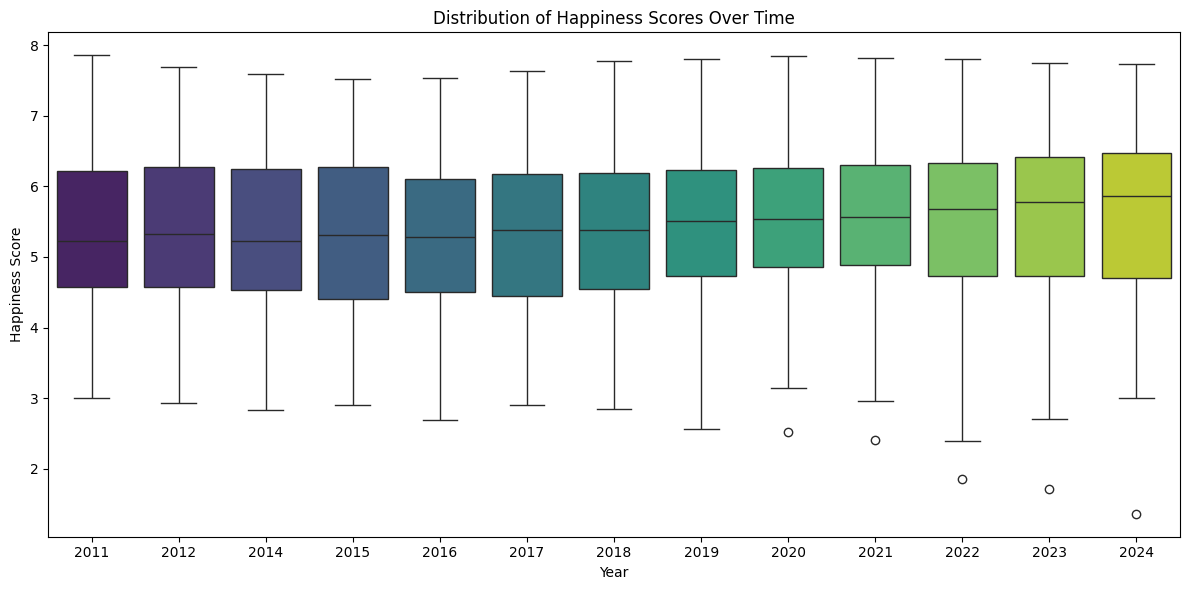

In [ ]:
#Box plot
print("\n")
print("-"*180)
print("Distribution of Happiness Scores Over Time (Box Plot)".center(180))
print("-"*180)

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='ladder_score', data=happy, palette='viridis')
plt.title('Distribution of Happiness Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show();

The box plot reveals a remarkably stable median happiness score over 14 years, even during global crises like COVID-19. This resilience points to strong underlying factors such as social support, trust, and economic stability (Huang & Zhang, 2021; Marshall et al., 2024; Helliwell et al., 2023). While short term disruptions occurred, core well-being levels held firm in many countries.

However, the interquartile range (IQR) and frequent outliers highlight ongoing global inequalities. High scoring nations like Finland contrast sharply with persistently low scoring countries such as Afghanistan and Zimbabwe. These disparities reflect structural issues such as governance quality, poverty, and institutional trust (Arachchi & Arachchi, 2021; Sarmiento-Prieto, 2023; Layard & De Neve, 2023).

Notably, 2020–2021 shows wider score spreads, capturing the uneven psychological impact of the pandemic. Countries with stronger safety nets and social trust showed greater resilience (Aknin et al., 2022; Park et al., 2022).

A possible narrowing IQR in recent years may signal convergence in well being, supported by rising digital access, health equity, and global prosocial behaviors (Sprague et al., 2023; Bartolini & Sarracino, 2021; Helliwell et al., 2025). This suggests a global shift toward shared values that foster happiness across borders.

##Happiness Trends over Time

In [ ]:
#sorted countries
countries = sorted(happy['country_name'].unique())

# Dropdown widget
country_dropdown = widgets.Dropdown(
    options=countries,
    value='Malaysia',
    description='Country:',
    layout={'width': '300px'}
)

#data labels
def update_trend(country):
    plt.figure(figsize=(10, 6))

    country_data = happy[happy['country_name'] == country].sort_values('year')

    #plot
    sns.lineplot(data=country_data,x='year',y='ladder_score',marker='o',markersize=8,linewidth=2,color='steelblue')

    # Add data labels
    for _, row in country_data.iterrows():
        plt.text(
            row['year'],  # x-position
            row['ladder_score'] + 0.01,  # y-position (slightly above point)
            f"{row['ladder_score']:.2f}",  # Formatted score
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
        )

    plt.title(f'Happiness Trend: {country}', pad=15)
    plt.xlabel('Year')
    plt.ylabel('Happiness Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#widget
widgets.interactive(update_trend, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', index=91, layout=Layout(width='300px'), options=('Afgha…

The interactive line plot provides a country specific view of the year over year changes in happiness scores, based on the World Happiness Report’s "Ladder Score" metric. This score reflects individuals’ self-assessed life satisfaction, influenced by economic conditions, social support, freedom, and institutional trust (Helliwell et al., 2024). By selecting a country from the dropdown, users can observe how its population’s subjective well-being has evolved from 2011 to 2024.

For instance, Malaysia shows moderate variability but maintains relative stability across the years. Despite global challenges like the COVID-19 pandemic, Malaysia's score did not experience extreme declines, suggesting the role of community resilience and public health policies in buffering against well-being shocks (Marshall et al., 2024). Conversely, countries like Finland, Denmark, and Iceland consistently top the happiness rankings due to strong welfare systems, high trust in institutions, and well-established mental health support (Sprague et al., 2023; Helliwell et al., 2023).

Countries experiencing political instability, economic crises, or social unrest tend to show more erratic trends. For example, some Latin American and sub-Saharan African countries exhibit downward trajectories during years marked by civil conflict or declining economic conditions (Sarmiento-Prieto, 2023). The data reveal how social capital, public trust, and supportive environments significantly affect national happiness over time (Arachchi & Arachchi, 2021; Huang & Zhang, 2021).

This visualization is not just descriptive but diagnostic. It helps identify the impact of policy shifts, governance quality, and cultural changes on a nation’s collective well-being. As research increasingly shows, investing in psychological, social, and community-level resources is key to sustaining happiness through global and local challenges (Park et al., 2022; Helliwell et al., 2024).

##Happiness Trends Comparisons

In [10]:
# Get sorted countries
countries = sorted(happy['country_name'].unique())

# Create interactive controls
country_checks = [widgets.Checkbox(description=country, value=False) for country in countries[:]]
select_all = widgets.Button(description="Select All")
clear_all = widgets.Button(description="Clear All")
compare_button = widgets.Button(description="Compare Selected", button_style='success')

# Organize controls in a scrollable box
checkboxes = widgets.VBox([
    widgets.HBox([select_all, clear_all]),
    widgets.VBox(country_checks,
                layout=widgets.Layout(height='300px', overflow_y='scroll'))
])

# Output area for the plot
plot_output = widgets.Output()

def update_plot(_):
    with plot_output:
        plot_output.clear_output(wait=True)

        selected = [box.description for box in country_checks if box.value]
        if not selected:
            print("Please select at least 1 country")
            return

        plt.figure(figsize=(12, 7))
        palette = sns.color_palette("husl", len(selected))

        # Plot each selected country
        for i, country in enumerate(selected):
            country_data = happy[happy['country_name'] == country].sort_values('year')
            plt.plot(
                'year', 'ladder_score',
                data=country_data,
                marker='o',
                markersize=8,
                linewidth=2,
                color=palette[i],
                label=country
            )

            # Add value labels
            for _, row in country_data.iterrows():
                plt.text(
                    row['year'],
                    row['ladder_score'] + 0.03,
                    f"{row['ladder_score']:.2f}",
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2),
                    color=palette[i]
                )

        # Customize plot
        plt.title('Happiness Trends: Country Comparison', pad=20, fontsize=14)
        plt.xlabel('Year', labelpad=10)
        plt.ylabel('Happiness Score', labelpad=10)
        plt.grid(True, alpha=0.2)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Button actions
def select_all_countries(_):
    for box in country_checks:
        box.value = True

def clear_all_countries(_):
    for box in country_checks:
        box.value = False

select_all.on_click(select_all_countries)
clear_all.on_click(clear_all_countries)
compare_button.on_click(update_plot)

# Display the interface
display(widgets.VBox([
    widgets.HTML("<h2>Select Countries to Compare (Max 5)</h2>"),
    widgets.HBox([
        checkboxes,
        plot_output
    ]),
    compare_button
]))


The interactive multi-country chart provides a powerful lens through which we can examine how happiness scores based on the World Happiness Report’s Ladder Score have evolved across countries. The ability to visually compare up to five nations over time reveals not only which countries lead in happiness, but also why these differences persist.

Countries like Finland, Denmark, and Iceland consistently show high and stable happiness levels. Their resilience is credited to strong social systems, low corruption, and high interpersonal trust traits emphasized in The World Happiness Report 2023 (Helliwell et al., 2023) and in Layard and De Neve’s comprehensive review on global well-being inequality (2023). These nations also displayed psychological resilience during COVID-19, as explored by Aknin et al. (2022), who found that institutional trust and social safety nets were critical to maintaining mental health during crises.

Conversely, countries such as Afghanistan or Lebanon exhibit lower and more unstable happiness scores, often tied to political conflict, poor governance, and limited access to public services. The World Bank’s 2022 Global Report on Fragility and Conflict highlights how these structural deficiencies significantly reduce life satisfaction, a point echoed by Sarmiento-Prieto (2023) in a regional analysis of institutional breakdowns and well-being in conflict-affected areas.

Middle tier countries like Malaysia, Brazil, or Turkey offer more dynamic trends. These countries often experience fluctuations in happiness in response to economic performance, political stability, and public trust. De Neve et al. (2020) argue that these factors, especially fairness, freedom, and social cohesion—are as important as GDP in shaping national well-being. Bartolini and Sarracino (2021) further note that social capitalsuch as community engagement and perceived belonging has a stronger long-term effect on well-being than income growth alone.

Most recently, the World Happiness Report 2025 introduced the concept of being “twice-blessed”, where both the giver and receiver of kindness benefit emotionally. This has meaningful implications for countries fostering prosocial behavior, as it shows that investing in social connection and empathy enhances national happiness outcomes (Helliwell et al., 2025).

In [ ]:
# buttons for factor selection
factor_radio = widgets.RadioButtons(
    options=[
        ('Gdp per Capita','explained_by_log_gdp_per_capita'),
        ('Social Support','explained_by_social_support'),
        ('Healty life Expectancy', 'explained_by_healthy_life_expectancy')
    ],
    description='Factor:'
)

#function
def update_correlation(factor):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=happy,
        x=factor,
        y='ladder_score',
        hue='year',
        palette='coolwarm',
        alpha=0.7
    )
    plt.title(f'Happiness vs. {factor.replace("explained_by_log", " ").replace("_", " ").title()}')
    plt.xlabel(factor.replace('explained_by_log', ' ').replace('_', ' ').title())
    plt.ylabel('Happiness Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#widget
widgets.interactive(update_correlation, factor=factor_radio)

interactive(children=(RadioButtons(description='Factor:', options=(('Gdp per Capita', 'explained_by_log_gdp_pe…

The scatterplot reveals strong positive correlations between happiness scores and three main factors: GDP per capita, social support, and healthy life expectancy. Among them, social support shows the most consistent and powerful association with well-being, echoing findings in the World Happiness Report 2023, which highlights it as a top predictor of life satisfaction (Helliwell et al., 2023).

Economic strength, measured by GDP per capita, also aligns with higher happiness, though its influence diminishes in wealthier nations—indicating that beyond a certain income threshold, other factors matter more (De Neve et al., 2020; Bartolini & Sarracino, 2021). This supports the idea that money matters, but only to a point.

Health, reflected in life expectancy, is another strong predictor. Healthier populations tend to report better well-being, as poor health reduces both productivity and emotional stability (Sarmiento-Prieto, 2023).

Together, these relationships highlight that well-being is multidimensional, driven not just by wealth but also by trust, health, and social connection especially in times of crisis like the COVID-19 pandemic (Aknin et al., 2022; Layard & De Neve, 2023).

In [9]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'happy' is DataFrame with the happiness data

## user-friendly widgets
factor_radio = widgets.RadioButtons(
    options=[
        ('GDP per capita', 'explained_by_log_gdp_per_capita'),
        ('Social Support', 'explained_by_social_support'),
        ('Healthy Life Expectancy', 'explained_by_healthy_life_expectancy'),
        ('Freedom', 'explained_by_freedom_to_make_life_choices'),
        ('Generosity', 'explained_by_generosity'),
        ('Corruption Perception', 'explained_by_perceptions_of_corruption')
    ],
    description='Select Factor:',
    layout={'width': 'max-content'},
    style={'description_width': 'initial'}
)

year_slider = widgets.IntRangeSlider(
    value=[happy['year'].min(), happy['year'].max()],
    min=happy['year'].min(),
    max=happy['year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

size_toggle = widgets.ToggleButtons(
    options=[('Small', 20), ('Medium', 50), ('Large', 100)],
    description='Point Size:',
    tooltips=['Small points', 'Medium points', 'Large points']
)

# update function
def update_plot(factor, year_range, size):
    plt.figure(figsize=(12, 7))

    # filter data by year
    filtered_data = happy[
        (happy['year'] >= year_range[0]) &
        (happy['year'] <= year_range[1])
    ]

    # scatter plot
    ax = sns.scatterplot(
        data=filtered_data,
        x=factor,
        y='ladder_score',
        hue='year',
        palette='viridis',
        size='year',
        sizes=(size, size * 2),
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )

    # Add regression line
    sns.regplot(
        data=filtered_data,
        x=factor,
        y='ladder_score',
        scatter=False,
        color='red',
        line_kws={'linestyle': '--', 'alpha': 0.5}
    )

    # aesthetics
    plt.title(f'Happiness Score vs. {factor_radio.options[factor_radio.index][0]} (Years {year_range[0]}–{year_range[1]})',
              pad=20, fontsize=14)
    plt.xlabel(factor_radio.options[factor_radio.index][0], labelpad=10)
    plt.ylabel('Happiness Score', labelpad=10)

    # legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(
        handles[:len(filtered_data['year'].unique())],
        labels[:len(filtered_data['year'].unique())],
        title='Year',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# create layout container
controls = widgets.VBox([
    factor_radio,
    year_slider,
    size_toggle
])

# combine all elements
dashboard = widgets.VBox([
    controls,
    widgets.interactive_output(
        update_plot,
        {
            'factor': factor_radio,
            'year_range': year_slider,
            'size': size_toggle
        }
    )
])

# display
display(dashboard)


The interactive Python dashboard enables dynamic exploration of how various factors—GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption perception—correlate with national happiness scores across different years and scales.

This tool reveals that social support and healthy life expectancy consistently show strong positive relationships with happiness, aligning with findings from the World Happiness Report 2023, which emphasizes social trust and health as top drivers of subjective well-being (Helliwell et al., 2023). In contrast, corruption perception tends to show an inverse trend, underscoring the role of institutional trust in life satisfaction (OECD, 2024).

By adjusting year ranges and marker size, users can visualize temporal changes and compare year-specific trends. The inclusion of regression lines enhances interpretability, reflecting patterns supported by research showing that well-being is best explained through a multidimensional lens involving economic, social, and governance indicators (Layard & De Neve, 2023; Aknin et al., 2022).

This visualization not only supports analytical clarity but also promotes data transparency, making it a powerful complement to statistical summaries and policy evaluation.

#Conclusion

In conclusion, this multi faceted visualization of global happiness data from 2011 to 2024 offers valuable insights into trends, disparities, and driving factors of subjective well-being. The box plot reveals that global median happiness has remained relatively stable despite disruptions such as the COVID-19 pandemic, underscoring the resilience of foundational well-being elements like social trust and support. Interactive bar charts highlight that Nordic countries consistently top the rankings due to strong governance, equitable economies, and social safety nets.

Country specific and comparative trend plots demonstrate that while some nations steadily improve, others remain stagnant or decline—often due to structural challenges such as conflict, corruption, or inadequate public services. Scatter plots correlating happiness with factors like GDP, social support, and life expectancy confirm that well-being is closely tied to both economic and social indicators.

Moreover, interactive tools allow dynamic exploration of how different countries and factors evolve over time, making complex data more intuitive. The consistent presence of countries like Finland and Denmark at the top, and others at the bottom, reinforces the global inequality in happiness levels. However, the narrowing gaps in some years suggest progress and potential convergence.

Overall, the analysis shows that happiness is not only measurable but also actionable. Nations that invest in social capital, public health, and inclusive governance are more likely to foster lasting well-being.

#References

Helliwell, J. F., Layard, R., Sachs, J. D., Aknin, L. B., De Neve, J.-E., & Wang, S. (2023). World Happiness Report 2023.

Aknin, L. B., Helliwell, J. F., De Neve, J.-E., et al. (2022). Policy stringency and mental health during the COVID‑19 pandemic: A longitudinal analysis of data from 15 countries. The Lancet Public Health, 7(5), e417–e426.

Layard, R., & De Neve, J.-E. (2023). The Inequality of Wellbeing. In Well‑being. Cambridge University Press.

De Neve, J.-E., Ward, G., Kavetsos, G., & Norton, M. I. (2020). The asymmetric experience of positive and negative economic growth: Global evidence using subjective well‑being data. Review of Economics and Statistics, 102(4), 678–689.

Bartolini, S., & Sarracino, F. (2021). Social capital drives subjective well‑being better than economic growth. Scientific Reports, 11, 1–10.

World Happiness Report 2025: Caring and Sharing (Executive Summary). University of Oxford, SDSN, Gallup. (2025)

Huang, L., & Zhang, T. (2021). Perceived social support, psychological capital, and subjective well-being among college students. Asia-Pacific Education Research, 31(5), 563–574.

Marshall, A., et al. (2024). Social support predicted subsequent subjective well-being during the COVID‑19 pandemic: a prospective study. BMC Public Health, 24, 18473.

Arachchi, J. I., & Imbulana Arachchi, A. (2021). The role of social capital in COVID-19 deaths. BMC Public Health, 21, 434.

Sarmiento-Prieto, M. (2023). Relevance of social capital in preserving subjective well-being in the face of COVID‑19. Risk, Hazards & Crisis in Public Policy.

Park, J., Uhm, J.‑P., et al. (2022). Sport community involvement and life satisfaction during COVID‑19: A moderated mediation. Frontiers in Psychology, 13, 861630.

Sprague, B., et al. (2023). Life satisfaction during COVID-19: the role of human, economic, social, and psychological capital. Journal of Happiness Studies, 24(7), 2201–2222.